# Landmark Detection with Aruco Markers
In this section we'll create a pose graph. We'll use optical flow estimates to construct odometry edges in our graph and detect arUco Markers as our landmark observations.
Code in this section has been adapted from https://pyimagesearch.com/2020/12/21/detecting-aruco-markers-with-opencv-and-python/


In [7]:
import argparse
import cv2
import sys
import matplotlib.pyplot as plt
import os
import numpy as np

[[[238. 127.]
  [513. 204.]
  [477. 329.]
  [206. 253.]]]
(array([[[-3.7256246 , -0.62936532,  0.02780582]]]), array([[[ 0.01253983, -0.01970374,  0.06428847]]]), array([[[-0.025,  0.025,  0.   ]],

       [[ 0.025,  0.025,  0.   ]],

       [[ 0.025, -0.025,  0.   ]],

       [[-0.025, -0.025,  0.   ]]], dtype=float32))
[[[214.  39.]
  [493. 106.]
  [462. 231.]
  [187. 167.]]]
(array([[[-3.61796729, -0.41207991, -0.12030622]]]), array([[[ 0.00864678, -0.03678749,  0.06113671]]]), array([[[-0.025,  0.025,  0.   ]],

       [[ 0.025,  0.025,  0.   ]],

       [[ 0.025, -0.025,  0.   ]],

       [[-0.025, -0.025,  0.   ]]], dtype=float32))
[[[227.  82.]
  [504. 154.]
  [470. 280.]
  [197. 209.]]]
(array([[[-3.66281397, -0.51934407, -0.06275547]]]), array([[[ 0.01073307, -0.02849539,  0.06246242]]]), array([[[-0.025,  0.025,  0.   ]],

       [[ 0.025,  0.025,  0.   ]],

       [[ 0.025, -0.025,  0.   ]],

       [[-0.025, -0.025,  0.   ]]], dtype=float32))
[[[252. 219.]
  [524. 303.]
  [

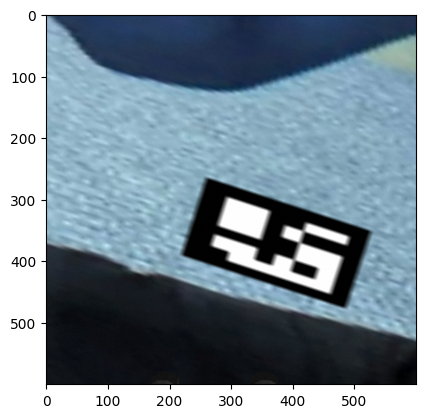

In [22]:
# General arUco information.
arucoDict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_1000)
arucoParams = cv2.aruco.DetectorParameters_create()

# General camera information.
camera_matrix = np.array([[299.99889804049286, 0.0, 300.5], 
                            [0.0, 299.99889804049286, 300.5],
                            [0.0, 0.0, 1.0]])
camera_matrix = cv2.getDefaultNewCameraMatrix(camera_matrix, (600, 600))
dist_coeffs = np.array([0,0,0,0,0])

# Get a sequence of images to process.
image_dir_gp = "/home/yoraish/data/2022-12-02_robomath"
img_fns = os.listdir(image_dir_gp)
img_gps = [os.path.join(image_dir_gp, img_fns[i]) for i in range(len(img_fns))]
for img_gp in img_gps:
    # Load the image.
    img = cv2.imread(img_gp)
    plt.imshow(img)
    # Find corners of arUco marker in the image.
    (detected_corners, ids, rejected) = cv2.aruco.detectMarkers(img, arucoDict,
        parameters=arucoParams)
        
    # If found any markers, estimate their pose w.r.t. the camera.
    if len(detected_corners) > 0:
        for marker_corners, marker_id in zip(detected_corners, ids):
            print(marker_corners)
            print(cv2.aruco.estimatePoseSingleMarkers(marker_corners, 0.05, camera_matrix, dist_coeffs))

    continue

    ######################33
    # verify *at least* one ArUco marker was detected
    if len(corners) > 0:
        # flatten the ArUco IDs list
        ids = ids.flatten()
        # loop over the detected ArUCo corners
        for (markerCorner, markerID) in zip(corners, ids):
            # extract the marker corners (which are always returned in
            # top-left, top-right, bottom-right, and bottom-left order)
            corners = markerCorner.reshape((4, 2))
            (topLeft, topRight, bottomRight, bottomLeft) = corners
            # convert each of the (x, y)-coordinate pairs to integers
            topRight = (int(topRight[0]), int(topRight[1]))
            bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
            bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
            topLeft = (int(topLeft[0]), int(topLeft[1]))
            # draw the bounding box of the ArUCo detection
            cv2.line(img, topLeft, topRight, (0, 255, 0), 2)
            cv2.line(img, topRight, bottomRight, (0, 255, 0), 2)
            cv2.line(img, bottomRight, bottomLeft, (0, 255, 0), 2)
            cv2.line(img, bottomLeft, topLeft, (0, 255, 0), 2)
            # compute and draw the center (x, y)-coordinates of the ArUco
            # marker
            cX = int((topLeft[0] + bottomRight[0]) / 2.0)
            cY = int((topLeft[1] + bottomRight[1]) / 2.0)
            cv2.circle(img, (cX, cY), 4, (0, 0, 255), -1)
            # draw the ArUco marker ID on the img
            cv2.putText(img, str(markerID),
                (topLeft[0], topLeft[1] - 15), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (0, 255, 0), 2)
            print("[INFO] ArUco marker ID: {}".format(markerID))
            # show the output img
            cv2.imshow("img", img)
            cv2.waitKey(0)
    
    
    ####################3###

    plt.imshow(img)
    plt.show()